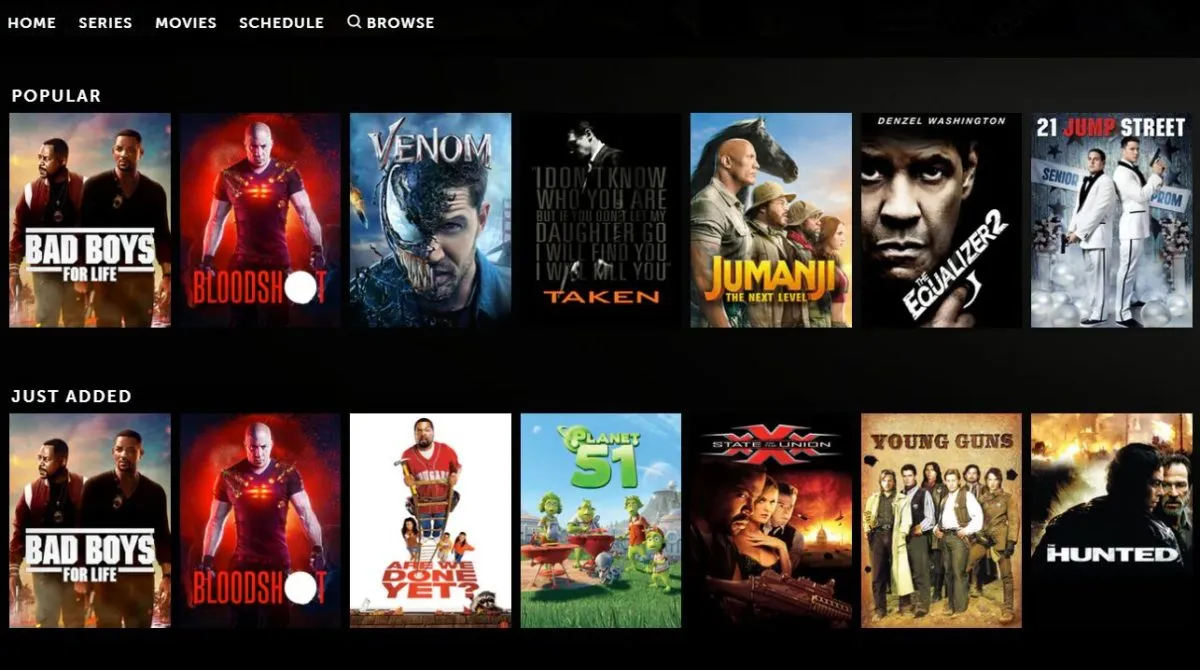

# **Movie Recommender System**
In an age of abundant choices, selecting the perfect movie can be an overwhelming task. My project, "Enhancing Movie Recommendations," aims to alleviate this dilemma by employing a robust set of data-driven techniques to provide tailored movie recommendations, enhancing the overall movie-watching experience.

### **Introduction:**
Movies, with their diverse genres, captivating narratives, and vast cultural appeal, stand as a cornerstone of entertainment across the globe. However, amidst the vast array of available films, discovering movies that resonate with individual preferences can be challenging. To address this challenge, we delve into the realm of recommender systems, leveraging data science methodologies to curate personalized movie suggestions.

### **Data Preprocessing:**
My journey begins with meticulous data preprocessing. We conduct an in-depth cleansing and transformation of the movie dataset, refining raw information into a structured format suitable for analysis. This crucial step involves handling missing values, standardizing data types, and ensuring data integrity, laying a solid foundation for subsequent analyses.

### **Exploratory Data Analysis (EDA):**
A comprehensive EDA unlocks hidden insights within the dataset, enabling us to comprehend movie distribution, user preferences, and genre trends. Through visualizations, statistical analyses, and trend examinations, we unravel patterns, outliers, and correlations essential for understanding user behavior and movie dynamics.

### **Word Clouds and Genre Analysis:**
Visual representations, such as word clouds, provide an intuitive depiction of movie genres' prevalence, shedding light on popular themes and aiding in genre-based analyses. This segment showcases genre distributions and preferences, aiding in content-based recommendations.

### **Recommender Systems:**
My project presents three distinct types of recommender systems. Firstly, a popularity-based approach offers insights into the most sought-after movies, providing a general overview of popular choices among viewers. Next, a content-based system leverages movie attributes, such as genres and keywords, to suggest similar movies based on content relevance. Finally, a user-based collaborative filtering system refines recommendations by analyzing user similarities and preferences, delivering personalized suggestions tailored to individual tastes.

### **Conclusion:**
In conclusion, "Enhancing Movie Recommendations" amalgamates data exploration, advanced analytics, and machine learning methodologies to streamline the movie selection process. By offering diverse recommendation strategies, my project endeavors to empower users with personalized movie suggestions, transforming the movie-watching journey into a more gratifying and enjoyable experience.

# Datasets Description

### Rating Dataset
- Rating data contains 105339 data points. It contains four columns which are:
- **userId**: Id of the user that gave the rating.
- **movieId**: Id of the movie for which the rating is given.
- **rating**: Rating given to movie.
- **timestamp**: Time at which the rating is given.


### Movies Dataset
- The movies dataset contain 10329 movies for which the users gave rating.
- It consist of following three columns:
- **movieId**: Id of the movie for which the rating is given.
- **title**: Title of the movie.
- **genre**: Genres of the movie.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# loading the datasets
rating = pd.read_csv("/content/ratings.csv")
movies = pd.read_csv("/content/movies (1).csv")

In [3]:
# checking the rating dataset
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [4]:
# checking the moves dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# getting info about rating
rating.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 105339 entries, 0 to 105338

Data columns (total 4 columns):

 #   Column     Non-Null Count   Dtype  

---  ------     --------------   -----  

 0   userId     105339 non-null  int64  

 1   movieId    105339 non-null  int64  

 2   rating     105339 non-null  float64

 3   timestamp  105339 non-null  int64  

dtypes: float64(1), int64(3)

memory usage: 3.2 MB


In [6]:
# getting info about movies data
movies.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10329 entries, 0 to 10328

Data columns (total 3 columns):

 #   Column   Non-Null Count  Dtype 

---  ------   --------------  ----- 

 0   movieId  10329 non-null  int64 

 1   title    10329 non-null  object

 2   genres   10329 non-null  object

dtypes: int64(1), object(2)

memory usage: 242.2+ KB


In [7]:
# getting basic statistics for rating data
rating.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


- The statistics of rating show that the average rating a movie got is 3.51, minimum rating a movie got is 1.04 and maximum rating a movie got is 5.


# Data Cleaning

In [8]:
# checking for null values in rating data
rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

- No, null value found in ratings data.

In [9]:
# checking for null values in movies data
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

- No, null value found in movies data.

In [10]:
# checking duplicate in rating
rating[rating.duplicated()]

,userId,movieId,rating,timestamp


- No, duplicate found in rating data

In [11]:
# checking duplicate in movies data
movies[movies.duplicated()]

,movieId,title,genres


- No, duplicate found in movies data

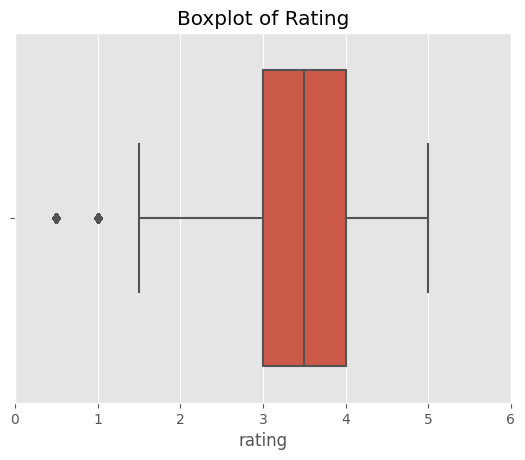

In [12]:
# making a boxplot for rating column
plt.style.use("ggplot")
sns.boxplot(x="rating",data=rating)
plt.title("Boxplot of Rating")
plt.xlim([0,6])
plt.show()

- The boxplot is showing two outliers, but in actual they are not, because movies can be rated 1 and 0.5.

In [13]:
# checking if all movies rating is present
movies[movies["movieId"].isin(rating["movieId"])  == False]

,movieId,title,genres
5262,7243,Intolerance: Love's Struggle Throughout the Ag...,Drama
5795,8785,Early Summer (Bakushû) (1951),Drama
7439,54290,Bratz: The Movie (2007),Comedy
10195,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi


- There are four movies whose rating is not available, or not given by users.

In [14]:
# combining both datasets
df = pd.merge(movies,rating,on="movieId",how="left")

In [15]:
# checking the combined dataset
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08


In [16]:
# getting info about data
df.info()


<class 'pandas.core.frame.DataFrame'>

Int64Index: 105343 entries, 0 to 105342

Data columns (total 6 columns):

 #   Column     Non-Null Count   Dtype  

---  ------     --------------   -----  

 0   movieId    105343 non-null  int64  

 1   title      105343 non-null  object 

 2   genres     105343 non-null  object 

 3   userId     105339 non-null  float64

 4   rating     105339 non-null  float64

 5   timestamp  105339 non-null  float64

dtypes: float64(3), int64(1), object(2)

memory usage: 5.6+ MB


In [17]:
# getting basic statistics of combined data
df.describe()

,movieId,userId,rating,timestamp
count,105343.000000,105339.000000,105339.000000,1.053390e+05
mean,13382.696373,364.924539,3.516850,1.130424e+09
std,26172.698128,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [18]:
# cheking for null values
df.isna().sum()

movieId      0
title        0
genres       0
userId       4
rating       4
timestamp    4
dtype: int64

- There are four null values in each of the three columns, it reflects that for some movies rating is not available.

In [19]:
# dropping the null values from data
df.dropna(inplace=True)

In [20]:
# checking for duplicate values
df[df.duplicated()]

,movieId,title,genres,userId,rating,timestamp


- No, duplicate value found in combined dataset

# Data Analysis and Visualization

In [21]:
# movie which has the minimum rating
movie_min_rat = df.loc[df["rating"] == df["rating"].min(),"title"]
print("Number of movies that got the minimum (0.5) rating are {}".format(len(movie_min_rat)))

Number of movies that got the minimum (0.5) rating are 1198


In [22]:
# movie which has the minimum rating
movie_max_rat = df.loc[df["rating"] == df["rating"].max(),"title"]
print("Number of movies that got the maximum (5) rating are {}".format(len(movie_max_rat)))

Number of movies that got the maximum (5) rating are 14856


In [23]:
# checking how many genre we have

# inititating an empty list
genres_list = []

# iterating on the genre column
for genre in df["genres"]:

  # splitting the genre column on pipe
  genre_split = genre.split("|")

  # iterating on splitted genres
  for i in genre_split:

    # applying an if-else condition to add the genre in the list if it is not present else pass
    if i not in genres_list:
      genres_list.append(i)
    else:
      pass

In [24]:
print("Number of genres we have {}".format(len(genres_list) - 1))

Number of genres we have 19


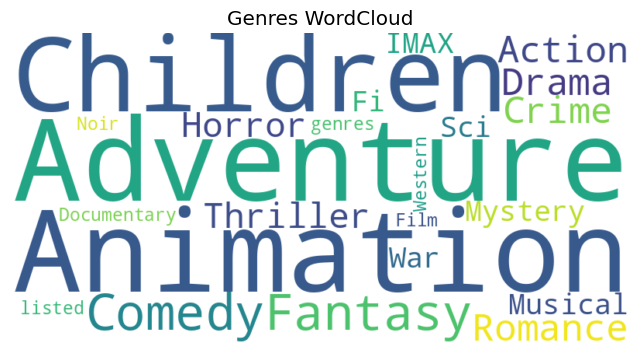

In [25]:
# Converting the list of genres to a string
genres_text = ' '.join(genres_list)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Visualizing the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Genres WordCloud")
plt.axis('off')
plt.show()


In [26]:
# extracting movie names to make word cloud

# initiating an empty list
name_list = []

# iterating over the movie titles
for name in df["title"].str[:-6]:

  # applying an if-else condition
  if name not in name_list:
    name_list.append(name)
  else:
    pass

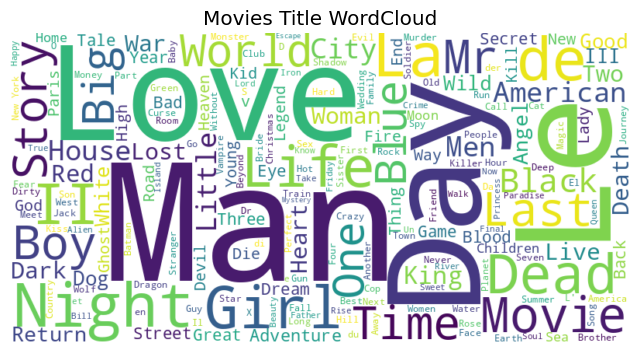

In [27]:
# now making a word cloud for movies titles
movies_text = ' '.join(name_list)

# Generating the word cloud
wordcloud_movies = WordCloud(width=800, height=400, background_color='white').generate(movies_text)

# Visualizing the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title("Movies Title WordCloud")
plt.axis('off')
plt.show()

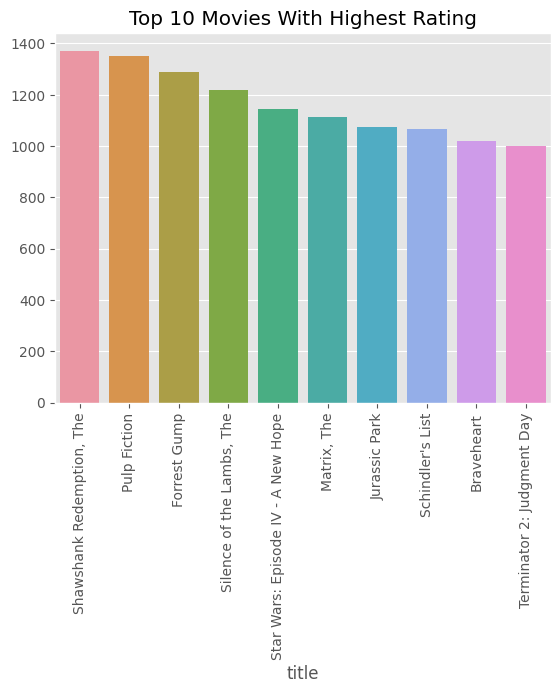

In [28]:
# averge rating given for each genre
movie_rating = df.groupby("title")["rating"].sum().sort_values(ascending=False)[:10]

# making a barplot
sns.barplot(x=movie_rating.index.str[:-7],y=movie_rating.values)
plt.title("Top 10 Movies With Highest Rating")
plt.xticks(rotation=90)
plt.show()

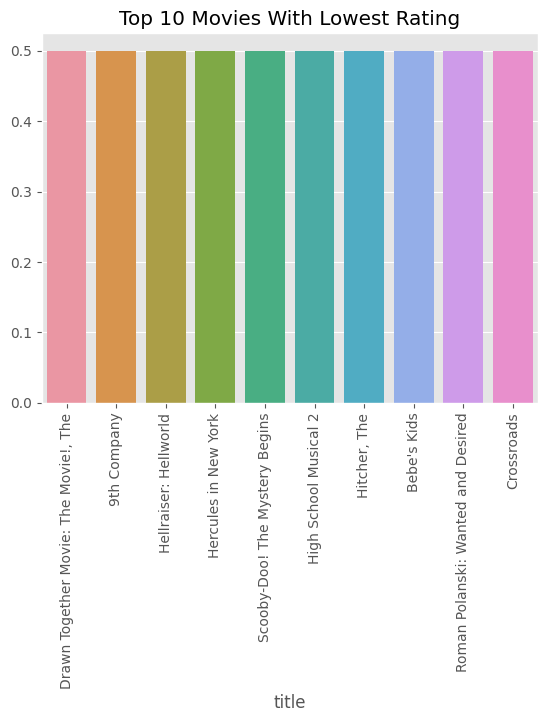

In [29]:
#  rating given for each genre
movie_rating_lowest = df.groupby("title")["rating"].sum().sort_values(ascending=True)[:10]

# making a barplot
sns.barplot(x=movie_rating_lowest.index.str[:-7],y=movie_rating_lowest.values)
plt.title("Top 10 Movies With Lowest Rating")
plt.xticks(rotation=90)
plt.show()

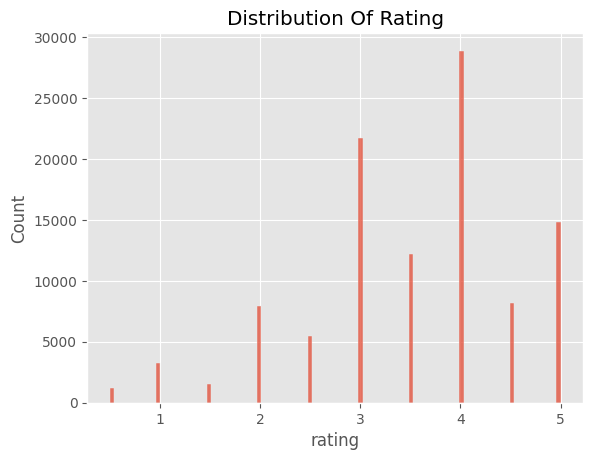

In [30]:
# distribution of rating
sns.histplot(x="rating",data=df,kde=False)
plt.title("Distribution Of Rating")
plt.show()

- The histogram shows that most movies are rated 4 rating

In [31]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08


# Popularity Based Recommender System
- A popularity-based recommendation algorithm recommends items based on their popularity or the number of interactions they have received. It doesn't take into account user preferences or personalized data but instead recommends items that are generally popular among users.

- For movies, a popularity-based algorithm might recommend movies that have received the most ratings or have been watched by the most users.
### **How it Works:**

- **Popularity Metric:** We analyze metrics such as average ratings, total number of ratings, or views for each movie across all users.
- **Ranking Movies:** Movies are ranked or sorted based on these popularity metrics. Movies with higher average ratings, more ratings, or higher viewership are considered more popular.
- **Recommendation Generation:** Top-ranked or most popular movies are recommended to users without considering their specific preferences or past interactions.

In [32]:
def popularity_based_recommender(genre, min_reviews, num_recommendations):
    # Filtering data based on the provided genre
    genre_data = df[df['genres'].str.contains(genre, case=False)]

    # Grouping movies by title and calculate count of ratings and average rating
    movie_ratings = genre_data.groupby('title').agg({'rating': ['count', 'mean']})
    movie_ratings.columns = ['rating_count', 'average_rating']

    # Filtering movies based on the minimum reviews threshold
    qualified_movies = movie_ratings[movie_ratings['rating_count'] >= min_reviews]

    # Sorting qualified movies by average rating in descending order
    qualified_movies = qualified_movies.sort_values(by='average_rating', ascending=False).head(num_recommendations)

    return qualified_movies



In [33]:
# Defining  inputs for the popularity based recommender system
input_genre = 'Crime'
min_reviews_threshold = 100
num_of_recommendations = 5

# Getting recommendations
popularity_recommendations = popularity_based_recommender(input_genre, min_reviews_threshold, num_of_recommendations)
print(popularity_recommendations)

                                  rating_count  average_rating

title                                                         

Shawshank Redemption, The (1994)           308        4.454545

Godfather, The (1972)                      210        4.392857

Usual Suspects, The (1995)                 228        4.328947

Fargo (1996)                               201        4.271144

Godfather: Part II, The (1974)             140        4.260714


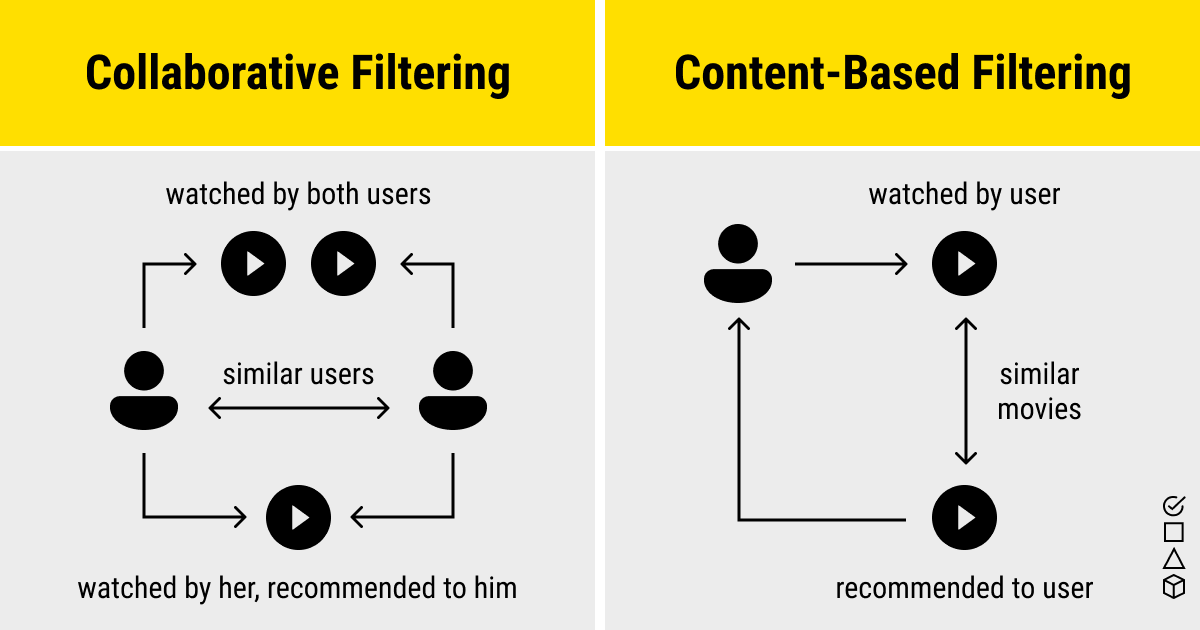

# **Content Based Recommender System**


- A Content-Based Recommender System suggests items (movies, articles, products) to users based on the similarity of item attributes or features.

- In our Content-Based Recommender System, movies are recommended to users based on the inherent characteristics or attributes of the movies themselves. We utilize various features such as genres, actors, directors, and plot keywords to understand the content of each movie. In my project, i will use genre as the feature.

### **How it Works:**

- **Feature Extraction:** We extract relevant information about each movie, including genres, cast, crew, and descriptive metadata.

- **User Profiling:** Based on a user's historical preferences or interactions, the system creates a user profile by analyzing movies they've rated highly or watched frequently.
- **Similarity Calculation:** Utilizing the content features of movies and the user profile, we compute the similarity between the user's preferences and the attributes of other movies.
- **Recommendation Generation:** Movies with content features similar to the user's profile are recommended. If a user enjoys action movies with specific actors or directors, the system suggests movies with similar attributes.




In [34]:
# removing the years from the movies titles
movies["title_updated"] = movies["title"].str[:-7]

In [35]:
# joining the genres
movies["genres_updated"] = movies["genres"].str.split("|").apply(lambda x: " ".join(x))

In [36]:
# converting the genres into lower case letters
movies["genres_updated"] = movies["genres_updated"].apply(lambda x: x.lower())

In [37]:
# checking the movies data
movies.head()

,movieId,title,genres,title_updated,genres_updated
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,adventure animation children comedy fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,adventure children fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,comedy


In [38]:
# Initiating the vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Filling missing values in 'genres' column
movies['genres'] = movies['genres'].fillna('')

# Applying TF-IDF vectorizer on genres (Coverting genres into vectors)
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Computing similarity scores using cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [39]:
def content_based_recommender(movie_title, num_recommendations):

    # Filtering data for the provided movie title
    movie_data = movies[movies['title_updated'].str.contains(movie_title, case=False)]

    # Getting the index of the movie title
    idx = movies[movies['title_updated'].str.contains(movie_title, case=False)].index

    # Getting similarity scores for the movie title
    sim_scores = list(enumerate(cosine_sim[idx][0]))

    # Sorting movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting movie indices of recommended movies
    movie_indices = [i[0] for i in sim_scores]

    # Excluding the input movie itself from recommendations
    movie_indices.remove(idx[0])

    # Getting top N recommended movie titles
    top_movies = movies.iloc[movie_indices][:num_recommendations]

    return top_movies




In [40]:
# Defining Inputs
input_movie_title = 'toy story'
num_of_recommendations = 5

# Getting recommendations
recommendations = content_based_recommender(input_movie_title, num_of_recommendations)
recommendations[['title_updated', 'genres_updated']]

,title_updated,genres_updated
1815,Antz,adventure animation children comedy fantasy
2496,Toy Story 2,adventure animation children comedy fantasy
2967,"Adventures of Rocky and Bullwinkle, The",adventure animation children comedy fantasy
3166,"Emperor's New Groove, The",adventure animation children comedy fantasy
3811,"Monsters, Inc.",adventure animation children comedy fantasy


# **User Based Collaborative Recommender System**
- User-based collaborative filtering is also called user-user collaborative filtering. It is a type of recommendation system algorithm that uses user similarity to make product recommendations.

### **How it Works:**

- **User Similarity Calculation:** We calculate the similarity between users based on their past movie ratings or interactions. Similarity metrics like cosine similarity, pearson correlation and etc help identify users with similar preferences. I will use pearson correlation.
- **Neighbor Selection:** From the pool of similar users, we select a subset (neighbors) who are most similar to the target user..
- **Preference Aggregation:** We aggregate the movie preferences or ratings of these similar users for items not yet rated by the target user.
- **Recommendation Generation:** Movies highly rated by the selected similar users but not yet seen by the target user are recommended.

In [41]:
# Number of users
print('The ratings dataset has', rating['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', rating['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', rating['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(rating['rating'].unique()))

The ratings dataset has 668 unique users

The ratings dataset has 10325 unique movies

The ratings dataset has 10 unique ratings

The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [42]:
# Merging ratings and movies datasets
df2 = pd.merge(rating, movies, on='movieId', how='inner')

# Checking the merged data
df2.head()

,userId,movieId,rating,timestamp,title,genres,title_updated,genres_updated
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,Casino,crime drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama,Casino,crime drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama,Casino,crime drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama,Casino,crime drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama,Casino,crime drama


In [43]:
# checking the same of data
df2.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 105339 entries, 0 to 105338

Data columns (total 8 columns):

 #   Column          Non-Null Count   Dtype  

---  ------          --------------   -----  

 0   userId          105339 non-null  int64  

 1   movieId         105339 non-null  int64  

 2   rating          105339 non-null  float64

 3   timestamp       105339 non-null  int64  

 4   title           105339 non-null  object 

 5   genres          105339 non-null  object 

 6   title_updated   105339 non-null  object 

 7   genres_updated  105339 non-null  object 

dtypes: float64(1), int64(3), object(4)

memory usage: 7.2+ MB


In [44]:
# Computing average rating for each movie and number of time it has been rated
agg_ratings = df2.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

# Keeping the movies which have been rated more than 100 times
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 150 entries, 60 to 10204

Data columns (total 3 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   title              150 non-null    object 

 1   mean_rating        150 non-null    float64

 2   number_of_ratings  150 non-null    int64  

dtypes: float64(1), int64(1), object(1)

memory usage: 4.7+ KB


In [45]:
# chekcing the movies that are rated most
agg_ratings_GT100.sort_values(by="number_of_ratings",ascending =False)


,title,mean_rating,number_of_ratings
7323,Pulp Fiction (1994),4.160000,325
3349,Forrest Gump (1994),4.138264,311
8136,"Shawshank Redemption, The (1994)",4.454545,308
4934,Jurassic Park (1993),3.659864,294
8228,"Silence of the Lambs, The (1991)",4.194828,290
...,...,...,...
1909,Clerks (1994),3.980198,101
9989,While You Were Sleeping (1995),3.564356,101
3835,"Green Mile, The (1999)",4.024752,101
841,Batman Begins (2005),4.039604,101


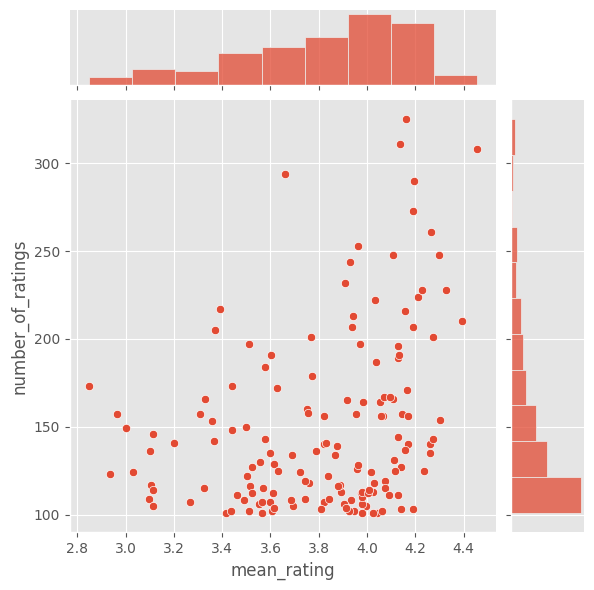

In [46]:
# exploring the relationship between number of ratings and average rating
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)
#plt.title("Joinplot of average ratings ang number of ratings")
plt.show()

- The scatterplot of jointplot is showing a correlation between average rating given to a movie and number of times it got rated. So, if the average rating of a movie tend to increase than the number of times it is rated also tends to increase. So, popular movies get higher ratings.
- The average rating distribution shows that most movies in the dataset have an average rating of around 4.

- The number of rating distribution shows that most movies have less than 150 ratings.



In [47]:
# Merging data to keep only movies data that has been rated more than 100 times
df_GT100 = pd.merge(df2, agg_ratings_GT100[['title']], on='title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 22556 entries, 0 to 22555

Data columns (total 8 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   userId          22556 non-null  int64  

 1   movieId         22556 non-null  int64  

 2   rating          22556 non-null  float64

 3   timestamp       22556 non-null  int64  

 4   title           22556 non-null  object 

 5   genres          22556 non-null  object 

 6   title_updated   22556 non-null  object 

 7   genres_updated  22556 non-null  object 

dtypes: float64(1), int64(3), object(4)

memory usage: 1.5+ MB


- To keep only the 134 movies with more than 100 ratings, we need to join the movie with the user-rating level dataframe.


In [48]:
# Number of users in merged data
print('The merged dataset has', df_GT100['userId'].nunique(), 'unique users')

# Number of movies in merged data
print('The merged dataset has', df_GT100['movieId'].nunique(), 'unique movies')

# Number of ratings in merged data
print('The merged dataset has', df_GT100['rating'].nunique(), 'unique ratings')

# List of unique ratings in merged data
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The merged dataset has 653 unique users

The merged dataset has 150 unique movies

The merged dataset has 10 unique ratings

The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [49]:
# Create user-item matrix
matrix = df_GT100.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,5.0,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
5,NaN,1.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We have created a user-item matrix, where columns are movies names and indexes are user ids.

# Data Normalization
- Since some people tend to give a higher rating than others, we normalize the rating by extracting the average rating of each user.

- After normalization, the movies with a rating less than the user's average rating get a negative value, and the movies with a rating more than the user's average rating get a positive value.

In [50]:
# Normalized user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,0.169231,NaN,NaN,NaN,...,NaN,0.169231,-0.830769,0.169231,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.111111,-0.111111,NaN,NaN,NaN,NaN,-0.111111,NaN,NaN
3,NaN,NaN,-0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.714286,1.285714,NaN,-0.714286,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.937500,NaN,NaN,NaN,NaN,0.9375,NaN,0.9375,NaN
5,NaN,-1.7,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Identifying Similar users
There are different ways to measure similarities. Pearson correlation and cosine similarity are two widely used methods.

In [51]:
# now we will identify similar users, using the pearson correlation method
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.614559,0.431124,-0.094491,0.471405,0.153463,0.369274,0.195776,-1.0,...,0.099066,0.375769,0.107583,0.349334,0.410803,-0.505322,0.029258,0.018696,0.144082,0.230468
2,-0.306186,1.000000,0.866025,-1.000000,NaN,NaN,-0.555556,0.577350,0.333333,NaN,...,-1.000000,NaN,0.816497,-0.577350,NaN,NaN,-0.174078,NaN,-1.000000,0.388556
3,0.614559,0.866025,1.000000,NaN,0.162938,NaN,-0.228587,1.000000,0.391121,-1.0,...,0.345186,0.585540,1.000000,0.000000,0.252050,-0.491398,0.484123,0.336336,0.392989,0.231076
4,0.431124,-1.000000,NaN,1.000000,NaN,NaN,-0.115186,NaN,-0.250000,NaN,...,-0.662266,NaN,-1.000000,0.408248,NaN,NaN,-0.801784,-0.063610,0.965824,0.291551
5,-0.094491,NaN,0.162938,NaN,1.000000,-0.970725,0.077671,NaN,-0.158114,NaN,...,-0.427828,NaN,NaN,0.960769,NaN,-0.548611,0.104257,-0.944911,-0.052658,-0.113529


In [52]:
# Picking a user ID
picked_userid = 1

# creating a copy for user_similarity_matrix to use later in my function
user_similarity_function = user_similarity.copy()

# Removing picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# checking the data
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
2,-0.306186,1.000000,0.866025,-1.0,NaN,NaN,-0.555556,0.57735,0.333333,NaN,...,-1.000000,NaN,0.816497,-0.577350,NaN,NaN,-0.174078,NaN,-1.000000,0.388556
3,0.614559,0.866025,1.000000,NaN,0.162938,NaN,-0.228587,1.00000,0.391121,-1.0,...,0.345186,0.58554,1.000000,0.000000,0.25205,-0.491398,0.484123,0.336336,0.392989,0.231076
4,0.431124,-1.000000,NaN,1.0,NaN,NaN,-0.115186,NaN,-0.250000,NaN,...,-0.662266,NaN,-1.000000,0.408248,NaN,NaN,-0.801784,-0.063610,0.965824,0.291551
5,-0.094491,NaN,0.162938,NaN,1.000000,-0.970725,0.077671,NaN,-0.158114,NaN,...,-0.427828,NaN,NaN,0.960769,NaN,-0.548611,0.104257,-0.944911,-0.052658,-0.113529
6,0.471405,NaN,NaN,NaN,-0.970725,1.000000,0.309426,NaN,NaN,NaN,...,0.302614,NaN,NaN,0.132453,NaN,NaN,-0.166667,NaN,1.000000,-0.080930


- In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.

- `n = 10` means we would like to pick the top 10 most similar users for user ID 1.

- The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the `user_similarity_threshold` to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

- After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then printed out the most similar users' ID and the Pearson correlation value.



In [53]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Getting top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Printing out top n similar users
print('The similar users for user {} are {}'.format(picked_userid,similar_users))

The similar users for user 1 are userId

34     1.000000

154    1.000000

67     1.000000

117    1.000000

533    1.000000

621    0.981981

526    0.966988

103    0.945343

271    0.943300

26     0.940582

Name: 1, dtype: float64


- Now, we will do two things:

  1. Remove the movies that have been watched by the target user (user ID 1 in this example).
  2. Keep only the movies that similar users have watched.

- To remove the movies watched by the target user, we keep only the row for `userId=1` in the user-item matrix and remove the items with missing values.

In [54]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Batman Begins (2005),"Beautiful Mind, A (2001)","Bourne Identity, The (2002)",Braveheart (1995),Casablanca (1942),Clear and Present Danger (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),There's Something About Mary (1998),Titanic (1997),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.169231,-0.830769,-0.830769,-1.330769,0.669231,0.169231,0.169231,0.169231,1.169231,0.669231,...,0.669231,0.669231,0.669231,-0.330769,-2.330769,-2.330769,-0.830769,0.169231,-0.830769,0.169231


- To keep only the similar users' movies, we keep the user IDs in the top 10 similar user lists and remove the film with all missing values. All missing value for a movie means that none of the similar users have watched the movie.

In [55]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,American Beauty (1999),American Pie (1999),Austin Powers: The Spy Who Shagged Me (1999),Batman Begins (2005),Being John Malkovich (1999),"Breakfast Club, The (1985)",Broken Arrow (1996),"Bug's Life, A (1998)",Casablanca (1942),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),...,Star Wars: Episode VI - Return of the Jedi (1983),There's Something About Mary (1998),Titanic (1997),Total Recall (1990),Toy Story (1995),Trainspotting (1996),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971)
userId,,,,,,,,,,,,,,,,,,,,,
26,NaN,NaN,-0.416667,NaN,1.083333,NaN,NaN,NaN,0.583333,NaN,...,NaN,-1.916667,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,...,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,-0.125,NaN,-0.625000,NaN,-0.125000,-0.625,NaN,NaN,NaN,0.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.875,-0.875,0.125,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,-1.0,NaN,-1.0
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,-1.000,-1.0,0.0,-1.0,NaN,1.0
526,NaN,0.4,0.400000,NaN,NaN,NaN,-0.6,-0.6,NaN,NaN,...,0.4,NaN,-1.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Next, we will drop the movies that user ID 1 watched from the similar user movie list. `errors='ignore'` drops columns if they exist without giving an error message.

In [56]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

title,American Pie (1999),Austin Powers: The Spy Who Shagged Me (1999),Being John Malkovich (1999),"Breakfast Club, The (1985)",Broken Arrow (1996),"Bug's Life, A (1998)",Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),E.T. the Extra-Terrestrial (1982),Ferris Bueller's Day Off (1986),"Fifth Element, The (1997)",...,"Hunt for Red October, The (1990)",In the Line of Fire (1993),Kill Bill: Vol. 1 (2003),Memento (2000),"Rock, The (1996)",Total Recall (1990),Toy Story (1995),Trainspotting (1996),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971)
userId,,,,,,,,,,,,,,,,,,,,,
26,NaN,-0.416667,1.083333,NaN,NaN,NaN,NaN,NaN,NaN,-1.416667,...,0.083333,-0.416667,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,-0.625000,-0.125000,-0.625,NaN,NaN,0.875,NaN,NaN,0.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.875,0.125,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.000,NaN,NaN,-1.0
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,-1.000,-1.0,NaN,1.0
526,0.4,0.400000,NaN,NaN,-0.6,-0.6,NaN,NaN,0.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Recommendations
- Now, we will decide which movie to recommend to the target user. The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

- This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 movies to recommend to user ID 1.

In [57]:
# A dictionary to store item scores
item_score = {}

# Looping through items
for i in similar_user_movies.columns:

  # Getting the ratings for movie i
  movie_rating = similar_user_movies[i]

  # Creating a variable to store the score
  total = 0

  # Creating a variable to store the number of scores
  count = 0

  # Looping through similar users
  for u in similar_users.index:

    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:

      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]

      # Add the score to the total score for the movie so far
      total += score

      # Add 1 to the count
      count +=1

  # Getting the average score for the item
  item_score[i] = total / count

# Converting dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sorting the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Selecting top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
12,Heat (1995),0.971650
6,Dr. Strangelove or: How I Learned to Stop Worr...,0.637500
21,Who Framed Roger Rabbit? (1988),0.548673
15,Kill Bill: Vol. 1 (2003),0.490990
2,Being John Malkovich (1999),0.446982
0,American Pie (1999),0.386795
8,Ferris Bueller's Day Off (1986),0.193398
7,E.T. the Extra-Terrestrial (1982),0.118168
13,"Hunt for Red October, The (1990)",0.078382
17,"Rock, The (1996)",0.000000


# Function for User-Based Collaborative Recommendation System

In [58]:
def user_based_recommender_system(user_id, threshold, num_recommendations):
    # Assuming user_similarity is already defined and contains similarity scores

    # Removing the picked user ID from the candidate list
    user_similarity_function.drop(index=user_id, inplace=True)

    # Number of similar users
    n = 10

    # User similarity threshold
    user_similarity_threshold = threshold

    # Getting top n similar users
    similar_users = user_similarity_function[user_similarity_function[user_id] > user_similarity_threshold][user_id].sort_values(ascending=False)[:n]

    # Movies that the target user has watched
    picked_userid_watched = matrix_norm[matrix_norm.index == user_id].dropna(axis=1, how='all')

    # Movies that similar users watched. Remove movies that none of the similar users have watched
    similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

    # Remove the watched movie from the movie list
    similar_user_movies.drop(picked_userid_watched.columns, axis=1, inplace=True, errors='ignore')

    # A dictionary to store item scores
    item_score = {}

    # Looping through items
    for i in similar_user_movies.columns:
        # Getting the ratings for movie i
        movie_rating = similar_user_movies[i]
        # Creating variables to store the score and the number of scores
        total = 0
        count = 0

        # Looping through similar users
        for u in similar_users.index:
            # If the movie has a rating
            if pd.isna(movie_rating[u]) == False:
                # Score is the sum of user similarity score multiplied by the movie rating
                score = similar_users[u] * movie_rating[u]
                # Add the score to the total score for the movie so far
                total += score
                # Increment the count
                count += 1

        # Calculate the average score for the item
        item_score[i] = total / count if count != 0 else 0

    # Converting dictionary to pandas DataFrame
    item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

    # Sorting the movies by score
    ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

    # Selecting top m movies
    top_movies = ranked_item_score.head(num_recommendations)

    return top_movies["movie"]




In [59]:
# Defining values for function
picked_user_id = 1
threshold_value = 0.3
number_of_recommendations = 10
recommendations = user_based_recommender_system(picked_user_id, threshold_value, number_of_recommendations)
print("Recommended Movies")
recommendations

Recommended Movies


12                                          Heat (1995)
6     Dr. Strangelove or: How I Learned to Stop Worr...
21                      Who Framed Roger Rabbit? (1988)
15                             Kill Bill: Vol. 1 (2003)
2                           Being John Malkovich (1999)
0                                   American Pie (1999)
8                       Ferris Bueller's Day Off (1986)
7                     E.T. the Extra-Terrestrial (1982)
13                     Hunt for Red October, The (1990)
17                                     Rock, The (1996)
Name: movie, dtype: object

# **Significance and Practical Applications:**

### **Enhanced User Experience:**
By offering personalized movie recommendations tailored to individual preferences, users can discover movies aligned with their tastes, leading to higher satisfaction and enjoyment during leisure time.

### **Entertainment Industry:**
Streaming platforms and movie theaters can leverage recommender systems to improve user engagement, increase viewership, and retain subscribers. It enhances the platform's content discovery experience, keeping users engaged and interested.

### **Marketing and Advertisement:**
Movie recommender systems can assist in targeted advertising by recommending movies or related products based on user preferences. It enables more effective marketing campaigns, leading to better customer engagement.

### **Content Curation:**
Recommender systems help in optimizing content libraries by highlighting lesser-known movies, diversifying the viewing experience, and preventing content overload. This aids in showcasing a wide range of films beyond mainstream titles.

### **Decision Support Systems:**
Recommender systems, when extended beyond movies, can be applied in various domains such as e-commerce (product recommendations), music streaming services, book recommendations, and more, assisting users in decision-making.

### **Personalization and User Engagement:**
These systems foster a personalized experience, leading to improved user engagement and interaction. They create a sense of customer satisfaction by catering to individual preferences and tastes.


### **Addressing Cold Start Problem:**
Popularity-based recommendations assist in scenarios where there's a lack of user data or new user onboarding, helping in initial recommendations until user profiles are established.

### **Research and Development:**
My project could serve as a foundation for further research and development in recommender systems, exploring hybrid models, advanced algorithms, or new features to enhance recommendation accuracy.